In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np

In [8]:
igv_all = pd.read_pickle('00_dataframes/2021-08-19_igv_outcome')
igv_table = pd.read_pickle('00_dataframes/2021-08-19_igv_perc_table')
igv_short = pd.read_pickle('00_dataframes/transp_igv_outcome')

In [9]:
shorter_igv = igv_short.copy().drop(index=4).reset_index(drop=True)

### Amount of variants for gene priorities, scores...

In [10]:
igv_short

,category,hot genes,warm genes - GUS,GUS,cold genes,spliceAI > 0.9,"ada, rf score > 0.6",MES high disruption,MES high new ss,"pos. rel. to ss < 3, intron",sums
1,"sufficient, yes",14,32,12,30,50,68,64,1,37,56
2,"sufficient, maybe",8,15,5,23,11,29,27,1,13,36
3,"sufficient, no",75,81,28,114,21,75,83,55,21,217
4,"not sufficient, yes",0,0,0,0,0,0,0,0,0,0
5,"not sufficient, maybe",3,7,1,12,13,19,21,0,10,16
6,"not sufficient, no",17,20,11,60,21,51,55,15,25,88


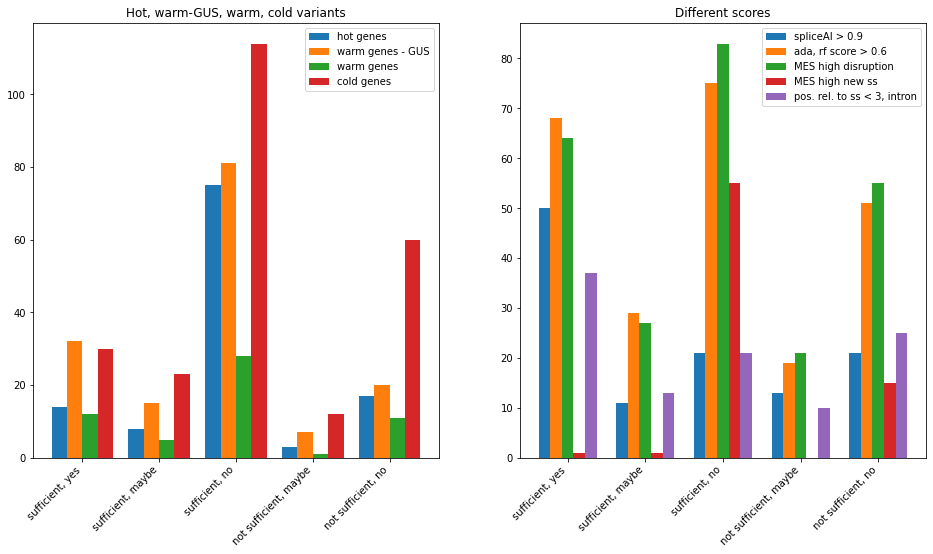

In [11]:
fig,axes = plt.subplots(figsize=(16,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# for gene priority (hot, warm-GUS, warm, cold)
ar1 = np.arange(5)
wid1 = 0.2
ax1.set_xticks(ar1)
ax1.set_xticklabels(shorter_igv['category'], rotation=45, ha='right')
ax1.set_title('Hot, warm-GUS, warm, cold variants')
bar1 = ax1.bar(ar1-1.5*wid1, shorter_igv['hot genes'], width=wid1, label='hot genes')
bar2 = ax1.bar(ar1-0.5*wid1, shorter_igv['warm genes - GUS'], width=wid1, label='warm genes - GUS')
bar3 = ax1.bar(ar1+0.5*wid1, shorter_igv['GUS'], width=wid1, label='warm genes')
bar4 = ax1.bar(ar1+1.5*wid1, shorter_igv['cold genes'], width=wid1, label='cold genes')
ax1.legend();

# for scores
ar2 = np.arange(5)
wid2 = 0.15
ax2.set_xticks(ar2)
ax2.set_xticklabels(shorter_igv['category'], rotation=45, ha='right')
ax2.set_title('Different scores')
bar21 = ax2.bar(ar2-2*wid2, shorter_igv['spliceAI > 0.9'], width=wid2, label='spliceAI > 0.9')
bar22 = ax2.bar(ar2-wid2, shorter_igv['ada, rf score > 0.6'], width=wid2, label='ada, rf score > 0.6')
bar23 = ax2.bar(ar2, shorter_igv['MES high disruption'], width=wid2, label='MES high disruption')
bar24 = ax2.bar(ar2+wid2, shorter_igv['MES high new ss'], width=wid2, label='MES high new ss')
bar25 = ax2.bar(ar2+2*wid2, shorter_igv['pos. rel. to ss < 3, intron'], width=wid2, 
                label='pos. rel. to ss < 3, intron')
ax2.legend();

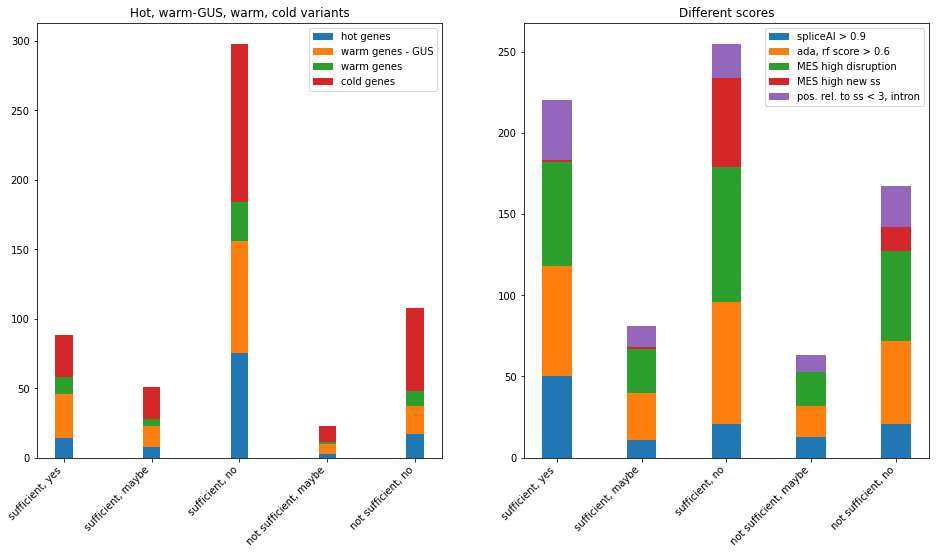

In [13]:
fig,axes = plt.subplots(figsize=(16,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# for gene priority (hot, warm-GUS, warm, cold)
ar1 = np.arange(5)
wid1 = 0.2
ax1.set_xticks(ar1)
ax1.set_xticklabels(shorter_igv['category'], rotation=45, ha='right')
ax1.set_title('Hot, warm-GUS, warm, cold variants')
bar1 = ax1.bar(shorter_igv['category'], shorter_igv['hot genes'], width=wid1, label='hot genes')
bar2 = ax1.bar(shorter_igv['category'], shorter_igv['warm genes - GUS'], width=wid1, 
               bottom=shorter_igv['hot genes'], label='warm genes - GUS')
bar3 = ax1.bar(shorter_igv['category'], shorter_igv['GUS'], width=wid1, label='warm genes', 
               bottom=shorter_igv['hot genes']+shorter_igv['warm genes - GUS'])
bar4 = ax1.bar(shorter_igv['category'], shorter_igv['cold genes'], width=wid1, label='cold genes', 
               bottom=shorter_igv['hot genes']+shorter_igv['warm genes - GUS']+shorter_igv['GUS'])
ax1.legend();

# for scores
ar2 = np.arange(5)
wid2 = 0.35
ax2.set_xticks(ar2)
ax2.set_xticklabels(shorter_igv['category'], rotation=45, ha='right')
ax2.set_title('Different scores')
bar21 = ax2.bar(shorter_igv['category'], shorter_igv['spliceAI > 0.9'], width=wid2, label='spliceAI > 0.9')
bar22 = ax2.bar(shorter_igv['category'], shorter_igv['ada, rf score > 0.6'], width=wid2, 
                label='ada, rf score > 0.6', bottom=shorter_igv['spliceAI > 0.9'])
bar23 = ax2.bar(shorter_igv['category'], shorter_igv['MES high disruption'], width=wid2, 
                label='MES high disruption', bottom=(shorter_igv['spliceAI > 0.9']+
                                                     shorter_igv['ada, rf score > 0.6']))
bar24 = ax2.bar(shorter_igv['category'], shorter_igv['MES high new ss'], width=wid2, 
                label='MES high new ss', bottom=(shorter_igv['spliceAI > 0.9']+
                                                 shorter_igv['ada, rf score > 0.6']+
                                                 shorter_igv['MES high disruption']))
bar25 = ax2.bar(shorter_igv['category'], shorter_igv['pos. rel. to ss < 3, intron'], width=wid2, 
                label='pos. rel. to ss < 3, intron', bottom=(shorter_igv['spliceAI > 0.9']+
                                                             shorter_igv['ada, rf score > 0.6']+
                                                             shorter_igv['MES high disruption']+
                                                             shorter_igv['MES high new ss']))
ax2.legend();

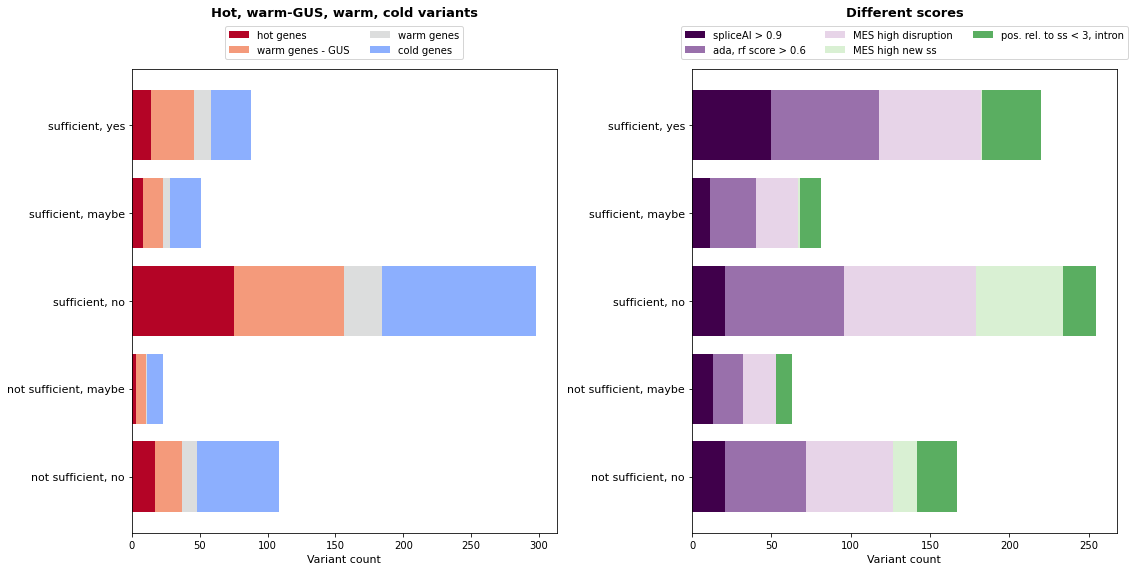

In [14]:
fig,axes = plt.subplots(figsize=(16,8), sharey=True)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# for gene priority (hot, warm-GUS, warm, cold)
ar1 = np.arange(5)
col1 = cm.coolwarm_r(np.arange(4)/4.)
wid1 = 0.2
ax1.set_yticks(ar1)
ax1.set_yticklabels(shorter_igv['category'], ha='right', fontsize=11)
ax1.set_title('Hot, warm-GUS, warm, cold variants', fontsize=13, fontweight='bold', y=1.1)
bar1 = ax1.barh(shorter_igv['category'], shorter_igv['hot genes'], label='hot genes', color=col1[0])
bar2 = ax1.barh(shorter_igv['category'], shorter_igv['warm genes - GUS'], 
               left=shorter_igv['hot genes'], label='warm genes - GUS', color=col1[1])
bar3 = ax1.barh(shorter_igv['category'], shorter_igv['GUS'], label='warm genes', 
               left=shorter_igv['hot genes']+shorter_igv['warm genes - GUS'], color=col1[2])
bar4 = ax1.barh(shorter_igv['category'], shorter_igv['cold genes'], label='cold genes', color=col1[3],
               left=shorter_igv['hot genes']+shorter_igv['warm genes - GUS']+shorter_igv['GUS'])
ax1.legend(bbox_to_anchor=(0.5,1.01), loc=8, ncol=2)
ax1.set_xlabel('Variant count', fontsize=11)
ax1.invert_yaxis();

# for scores
ar2 = np.arange(5)
col2 = cm.PRGn(np.arange(5)/5.)
wid2 = 0.35
ax2.set_yticks(ar2)
ax2.set_yticklabels(shorter_igv['category'], ha='right', fontsize=11)
ax2.set_title('Different scores', fontsize=13, fontweight='bold', y=1.1)
bar21 = ax2.barh(shorter_igv['category'], shorter_igv['spliceAI > 0.9'], label='spliceAI > 0.9', color=col2[0])
bar22 = ax2.barh(shorter_igv['category'], shorter_igv['ada, rf score > 0.6'], 
                label='ada, rf score > 0.6', left=shorter_igv['spliceAI > 0.9'], color=col2[1])
bar23 = ax2.barh(shorter_igv['category'], shorter_igv['MES high disruption'], 
                label='MES high disruption', left=(shorter_igv['spliceAI > 0.9']+
                                                     shorter_igv['ada, rf score > 0.6']), color=col2[2])
bar24 = ax2.barh(shorter_igv['category'], shorter_igv['MES high new ss'], 
                label='MES high new ss', left=(shorter_igv['spliceAI > 0.9']+
                                                 shorter_igv['ada, rf score > 0.6']+
                                                 shorter_igv['MES high disruption']), color=col2[3])
bar25 = ax2.barh(shorter_igv['category'], shorter_igv['pos. rel. to ss < 3, intron'],  
                label='pos. rel. to ss < 3, intron', left=(shorter_igv['spliceAI > 0.9']+
                                                             shorter_igv['ada, rf score > 0.6']+
                                                             shorter_igv['MES high disruption']+
                                                             shorter_igv['MES high new ss']), color=col2[4]);
ax2.legend(bbox_to_anchor=(0.5,1.01), loc=8, ncol=3)
ax2.set_xlabel('Variant count', fontsize=11)
ax2.invert_yaxis()
plt.tight_layout();
plt.savefig('02_output_analysis/2021-08-18_first_variant_overview.pdf')

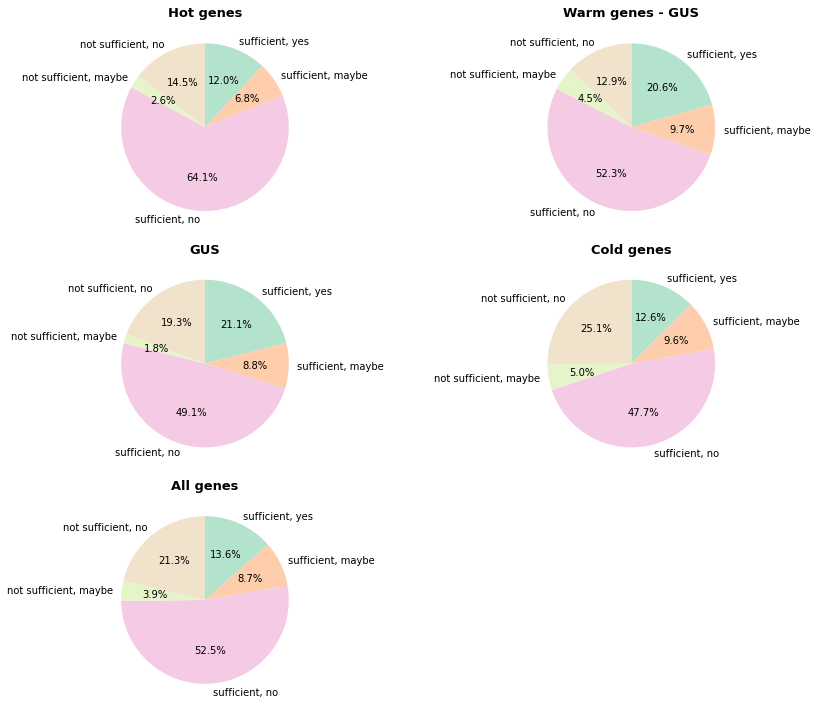

In [15]:
cols = cm.Pastel2(np.arange(5)/5.)

fig = plt.subplots(figsize=(12,10))
ax1 = plt.subplot(3,2,1)
ax1.set_title('Hot genes', fontweight='bold', fontsize=13)
ax1.pie(shorter_igv['hot genes'], labels=shorter_igv['category'], counterclock=False, startangle=90, colors=cols, 
        autopct='%1.1f%%', pctdistance=0.6);

ax2 = plt.subplot(3,2,2)
ax2.set_title('Warm genes - GUS', fontweight='bold', fontsize=13)
ax2.pie(shorter_igv['warm genes - GUS'], labels=shorter_igv['category'], counterclock=False, startangle=90, 
        colors=cols, autopct='%1.1f%%', pctdistance=0.6);

ax3 = plt.subplot(3,2,3)
ax3.set_title('GUS', fontweight='bold', fontsize=13)
ax3.pie(shorter_igv['GUS'], labels=shorter_igv['category'], counterclock=False, startangle=90, colors=cols, 
        autopct='%1.1f%%', pctdistance=0.6);

ax4 = plt.subplot(3,2,4)
ax4.set_title('Cold genes', fontweight='bold', fontsize=13)
ax4.pie(shorter_igv['cold genes'], labels=shorter_igv['category'], counterclock=False, startangle=90, colors=cols, 
        autopct='%1.1f%%', pctdistance=0.6);

ax5 = plt.subplot(3,2,5)
ax5.set_title('All genes', fontweight='bold', fontsize=13)
ax5.pie(shorter_igv['sums'], labels=shorter_igv['category'], counterclock=False, startangle=90, colors=cols, 
        autopct='%1.1f%%', pctdistance=0.6);

plt.tight_layout()

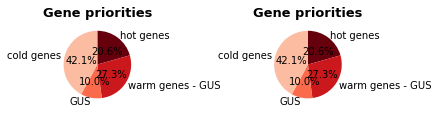

In [21]:
fig = plt.subplots(figsize=(6,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('Gene priorities', fontweight='bold', fontsize=13)
ax1.pie([117, 155, 57, 239], labels=['hot genes', 'warm genes - GUS', 'GUS', 'cold genes'], counterclock=False, 
        startangle=90, colors=cm.Reds_r(np.arange(4)/4), autopct='%1.1f%%', pctdistance=0.5);

ax2 = plt.subplot(1,2,2)
ax2.set_title('Gene priorities', fontweight='bold', fontsize=13)
ax2.pie([117, 155, 57, 239], labels=['hot genes', 'warm genes - GUS', 'GUS', 'cold genes'], counterclock=False, 
        startangle=90, colors=cm.Reds_r(np.arange(4)/4), autopct='%1.1f%%', pctdistance=0.5);

plt.tight_layout()